In [2]:
pip install pyEX

     |████████████████████████████████| 163 kB 21.1 MB/s 
     |████████████████████████████████| 503 kB 54.9 MB/s 
     |████████████████████████████████| 792 kB 63.3 MB/s 
     |████████████████████████████████| 374 kB 57.0 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 70 kB 9.7 MB/s 
     |████████████████████████████████| 339 kB 66.9 MB/s 
  Created wheel for sseclient: filename=sseclient-0.0.27-py3-none-any.whl size=5584 sha256=eb3101cc94c99786f501055480842f4558392ddc6a7e1e7290ed828313ca3982
  Stored in directory: /root/.cache/pip/wheels/07/67/7e/96edf627ac746de1a5c5cbb8d59ed960f033b8352dc12c545d
Successfully built sseclient
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 1.5.1
    Uninstalling tzlocal-1.5.1:
      Successfully uninstalled tzlocal-1.5.1
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  A

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pyEX as p
ticker = 'AMD'
timeframe = '6m'
hdfc=pd.read_csv('/content/HDFCBANK.NS.csv')
print(hdfc.shape)

hdfc.index = hdfc["Date"].apply(lambda x: pd.Timestamp(x))
hdfc.drop("Date", axis=1, inplace=True)

hdfc.tail()


(246, 7)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-22,1150.000000,1153.500000,1135.400024,1138.074951,1128.533447,15201940
2019-03-25,1130.000000,1143.925049,1126.500000,1140.650024,1131.087036,4599630
2019-03-26,1137.949951,1157.500000,1136.300049,1155.675049,1145.985962,5893424
2019-03-27,1159.275024,1164.025024,1139.525024,1149.724976,1140.085938,6942650
2019-03-28,1149.400024,1162.500000,1143.925049,1151.400024,1141.746826,9777164


     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 6.4 MB 45.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.31.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


  Created wheel for ta: filename=ta-0.8.0-py3-none-any.whl size=28895 sha256=fa82beae27792ec71b18fb0ddb47b16628bd4f4889308f8ca71f80cee2cdb037
  Stored in directory: /root/.cache/pip/wheels/7e/da/86/65cba22446ae2ef148de2079907264ef27feecfb7f51a45e0d
Successfully built ta


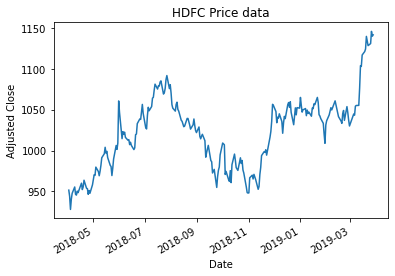

In [5]:
!pip install yfinance
!pip install ta
import yfinance as yf
import ta
from datetime import date, timedelta, datetime
from IPython.display import clear_output
#Visually show the stock price
hdfc['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("HDFC Price data")
plt.show()

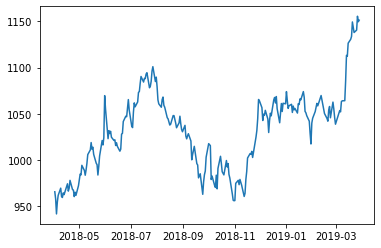

In [7]:
#df = p.chartDF(ticker, timeframe)
hdfc_y = hdfc[['Close']]
hdfc_y.reset_index(level=0, inplace=True)
hdfc_y.columns=['ds','y']
plt.plot(hdfc_y.ds, hdfc_y.y, label='AMD')
plt.show()

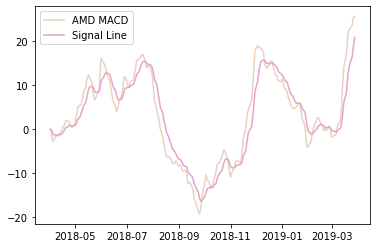

In [8]:
exp1 = hdfc_y.y.ewm(span=12, adjust=False).mean()
exp2 = hdfc_y.y.ewm(span=26, adjust=False).mean()
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.plot(hdfc_y.ds, macd, label='AMD MACD', color = '#EBD2BE')
plt.plot(hdfc_y.ds, exp3, label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()

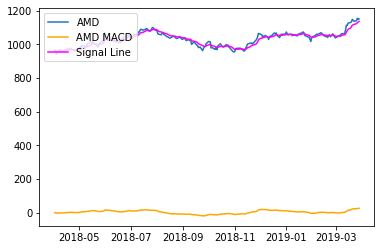

In [10]:
exp1 = hdfc_y.y.ewm(span=12, adjust=False).mean()
exp2 = hdfc_y.y.ewm(span=26, adjust=False).mean()
exp3 = hdfc_y.y.ewm(span=9, adjust=False).mean()
macd = exp1-exp2
plt.plot(hdfc_y.ds, hdfc_y.y, label='AMD')
plt.plot(hdfc_y.ds, macd, label='AMD MACD', color='orange')
plt.plot(hdfc_y.ds, exp3, label='Signal Line', color='Magenta')
plt.legend(loc='upper left')
plt.show()